Welcome to this workshop on EDA (Exploratory data analysis). 

Maybe you've noticed but the workshops of past weeks have largely followed the typical data science lifecycle: starting from importing (and/or collecting the data) from various places and file types and cleaning it. Now we move on to exploratory data analysis (EDA). EDA is all about visual and statistical first glimpses of your data. 

In this workshop we will work with the following data from Kaggle: https://www.kaggle.com/dgluesen/sales-and-workload-data-from-retail-industry 

It contains information on sales and workload in the retail industry.

Though we will focus on working with time series and EDA, this data set is a good candidate for data cleaning as well. 

Things we will practice in this notebook:

- Importing the data
- Inspecting percentage of missing values
- Working with datetime objects
- How to structure our approach when we have longitudinal data (department sales over time) 
- Statistical EDA
- Visual EDA: boxplots, violinplots

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
# Suppress scientific notation

pd.options.display.float_format = '{:.2f}'.format

**Q1. Import the sales and workload data, calling it 'sales' and 'workload', respectively. Explore the excel sheet and check carefully the headers, as well as sheets.**

In [267]:
sales = pd.read_excel('salesworkload.xlsx', sheet_name=0 ,header=1)
workload = pd.read_excel('salesworkload.xlsx', sheet_name=1 ,header=5)

In [40]:
sales.head()

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Customer,Area (m2),Opening hours
0,10.2016,1.0,United Kingdom,88253.0,London (I),1.0,Dry,3184.76,0.0,398560.0,1226244.0,NaN,953.04,Type A
1,10.2016,1.0,United Kingdom,88253.0,London (I),2.0,Frozen,1582.94,0.0,82725.0,387810.0,NaN,720.48,Type A
2,10.2016,1.0,United Kingdom,88253.0,London (I),3.0,other,47.205,0.0,438400.0,654657.0,NaN,966.72,Type A
3,10.2016,1.0,United Kingdom,88253.0,London (I),4.0,Fish,1623.85,0.0,309425.0,499434.0,NaN,1053.36,Type A
4,10.2016,1.0,United Kingdom,88253.0,London (I),5.0,Fruits & Vegetables,1759.17,0.0,165515.0,329397.0,NaN,1053.36,Type A


In [14]:
workload.head()

,id,Store name,Region,Scheme,10,11,12,1,2,3,...,12.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1
0,88253,88253 London (I),United Kingdom,Type A,382,367,350,382,352,380,...,1099,1481,1833,2213,2565,2932,3267,3664,4059,4426
1,38976,38976 Manchester,United Kingdom,Type A,382,367,350,382,352,380,...,1099,1481,1833,2213,2565,2932,3267,3664,4059,4426
2,17647,17647 Liverpool,United Kingdom,Type A,382,367,350,382,352,380,...,1099,1481,1833,2213,2565,2932,3267,3664,4059,4426
3,22117,22117 Birmingham,United Kingdom,Type A,382,367,350,382,352,380,...,1099,1481,1833,2213,2565,2932,3267,3664,4059,4426
4,73949,73949 Leicester,United Kingdom,Type B,342,342,313,342,314,341,...,997,1339,1653,1994,2308,2636,2935,3291,3646,3974


**Q2.Check the percentage of missing values in each of the data frames.** 

In [268]:
sales.isnull().sum().sum()/sales.size

0.07232399358280789

In [22]:
workload.isnull().sum().sum()/workload.size

0.034482758620689655

**Q3. Inspect the types of the columns in each of the data sets. What does that tell you?**

In [269]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7658 entries, 0 to 7657
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MonthYear      7658 non-null   object 
 1   Time index     7650 non-null   float64
 2   Country        7650 non-null   object 
 3   StoreID        7650 non-null   float64
 4   City           7650 non-null   object 
 5   Dept_ID        7650 non-null   float64
 6   Dept. Name     7650 non-null   object 
 7   HoursOwn       7650 non-null   object 
 8   HoursLease     7650 non-null   float64
 9   Sales units    7650 non-null   float64
 10  Turnover       7650 non-null   float64
 11  Customer       0 non-null      float64
 12  Area (m2)      7650 non-null   object 
 13  Opening hours  7650 non-null   object 
dtypes: float64(7), object(7)
memory usage: 837.7+ KB


In [24]:
workload.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           50 non-null     int64  
 1   Store name   50 non-null     object 
 2   Region       50 non-null     object 
 3   Scheme       50 non-null     object 
 4   10           50 non-null     int64  
 5   11           50 non-null     int64  
 6   12           50 non-null     int64  
 7   1            50 non-null     int64  
 8   2            50 non-null     int64  
 9   3            50 non-null     int64  
 10  4            50 non-null     int64  
 11  5            50 non-null     int64  
 12  6            50 non-null     int64  
 13  7            50 non-null     int64  
 14  8            50 non-null     int64  
 15  9            50 non-null     int64  
 16  Unnamed: 16  0 non-null      float64
 17  10.1         50 non-null     int64  
 18  11.1         50 non-null     int64  
 19  12.1      

**Q4. In each of the data sets, there is one column with only null/missing entries. Drop them both.**

In [270]:
sales = sales.drop('Customer', axis=1)
workload = workload.drop('Unnamed: 16', axis=1)

**Q5. Let's transform the MonthYear variable from the sales data set to a datetime64 type. You may get an error, try to understand why and fix it.**

In [271]:
sales['MonthYear'] = pd.to_datetime(sales['MonthYear'], format='%m.%Y')

ValueError: time data ' - - - - ' does not match format '%m.%Y' (match)

In [272]:
sales.MonthYear.value_counts()

06.2017      850
05.2017      850
12.2016      850
11.2016      850
01.2017      850
03.2017      850
10.2016      850
02.2017      850
04.2017      850
 - - - -       8
Name: MonthYear, dtype: int64

We see we have some string (----) values in the MonthYear. Let's drop them from the data set since there are only 8 of them. Then try to transform to a datetime object. 

In [273]:
# Be careful because there is an empty string in the beginning and end of the (----). To ensure that is the case, use index after value_counts
sales.MonthYear.value_counts().index

Index(['06.2017', '05.2017', '12.2016', '11.2016', '01.2017', '03.2017',
       '10.2016', '02.2017', '04.2017', ' - - - - '],
      dtype='object')

In [274]:
sales = sales.loc[sales.MonthYear!= ' - - - - ', :]
sales.MonthYear.value_counts()

06.2017    850
05.2017    850
12.2016    850
11.2016    850
01.2017    850
03.2017    850
10.2016    850
02.2017    850
04.2017    850
Name: MonthYear, dtype: int64

In [275]:
# Let's transform now to a datetime type
sales['MonthYear'] = pd.to_datetime(sales['MonthYear'], format='%m.%Y')

**Q6. Build a feature for the month and another for the year. Yes, we could have just split the MonthYear on '.' when it was of type object but it's good to practice a bit more with datetimes.**

In [276]:
sales['month'] = sales['MonthYear'].dt.month
sales['year'] = sales['MonthYear'].dt.year

### Statistical EDA

Statistical EDA is all about first grasp of the data we have and its distributions. Some statistical measure we may want to know are the mean/average of columns, the median, the 25th and 75th percentiles, the mode, the standard devitation.

**Q7.Look at the means, stds, and medians of the features in the sales data. Which features (ignoring ID and time-related features) have a mean larger than the median? Is that what you expected?**

In [277]:
sales.describe()

,Time index,StoreID,Dept_ID,HoursLease,Sales units,Turnover,month,year
count,7650.00,7650.00,7650.00,7650.00,7650.00,7650.00,7650.00,7650.00
mean,5.00,61995.22,9.47,22.04,1076470.71,3721392.94,6.00,2016.67
std,2.58,29924.58,5.34,133.30,1728113.22,6003380.29,3.83,0.47
min,1.00,12227.00,1.00,0.00,0.00,0.00,1.00,2016.00
25%,3.00,29650.00,5.00,0.00,54571.25,272679.75,3.00,2016.00
50%,5.00,75400.50,9.00,0.00,293230.00,931957.50,5.00,2017.00
75%,7.00,87703.00,14.00,0.00,917507.50,3264432.00,10.00,2017.00
max,9.00,98422.00,18.00,3984.00,11242955.00,42717390.00,12.00,2017.00


Very often it will be the case that a few high values will skew the average and it will be higher than the median, as we see here with features such as the 'Turnover', 'Sales units' and the 'HoursLease'.

In other cases, a few extremely low values could be decreasing the average. Therefore, one may want to work with the median. 

**Q7.1. Now try to call the .describe() method to a column of object type, such as the Department Name in the sales data. Try to find a different way as well to see the frequency of the various categories of Departments.** 

In [278]:
sales['Dept. Name'].describe()

count     7650
unique      17
top        all
freq       450
Name: Dept. Name, dtype: object

In [279]:
sales['Dept. Name'].value_counts()

all                    450
Customer Services      450
Frozen                 450
Clothing               450
Dry                    450
Admin                  450
Fruits & Vegetables    450
Hardware               450
Non Food               450
Delivery               450
others                 450
Food                   450
Meat                   450
Household              450
Fish                   450
other                  450
Checkout               450
Name: Dept. Name, dtype: int64

**Q8. 
Often it's quite difficult to understand the level of aggregation we may need to apply at a problem. In this case, we have sales per StoreID and each StoreID can contain different numbers of departments.**

    Explore how many different departments you have, and how many per StoreID.

In [280]:
sales.head()

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Area (m2),Opening hours,month,year
0,2016-10-01,1.00,United Kingdom,88253.00,London (I),1.00,Dry,3184.76,0.00,398560.00,1226244.00,953.04,Type A,10,2016
1,2016-10-01,1.00,United Kingdom,88253.00,London (I),2.00,Frozen,1582.94,0.00,82725.00,387810.00,720.48,Type A,10,2016
2,2016-10-01,1.00,United Kingdom,88253.00,London (I),3.00,other,47.20,0.00,438400.00,654657.00,966.72,Type A,10,2016
3,2016-10-01,1.00,United Kingdom,88253.00,London (I),4.00,Fish,1623.85,0.00,309425.00,499434.00,1053.36,Type A,10,2016
4,2016-10-01,1.00,United Kingdom,88253.00,London (I),5.00,Fruits & Vegetables,1759.17,0.00,165515.00,329397.00,1053.36,Type A,10,2016


In [281]:
sales.Dept_ID.nunique()

17

In [282]:
sales.StoreID.nunique()

50

In [283]:
# Check number of unique departments per Store ID and month. 
sales.groupby('StoreID')[['Dept_ID', 'month']].nunique()

,Dept_ID,month
StoreID,,
12227.00,17,9
15552.00,17,9
16927.00,17,9
17647.00,17,9
18808.00,17,9
19000.00,17,9
19340.00,17,9
19769.00,17,9
20166.00,17,9


### Visual EDA

**Q9.Create 2 box plots: one for the sales' turnover by months, another across years. Do you spot any differences in months/years?.**

    Hint: You can use either seaborn's .boxplot() or matplotlib's .boxplot()

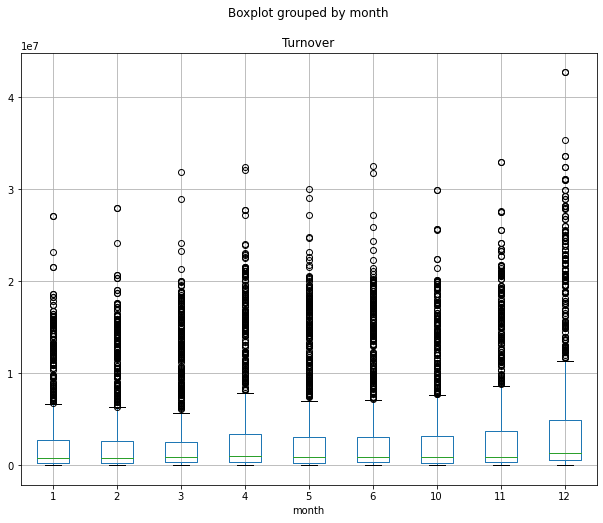

In [285]:
sales.boxplot(column='Turnover', by='month', figsize=(10, 8))

Text(0.5, 1.0, 'Turnover by month')

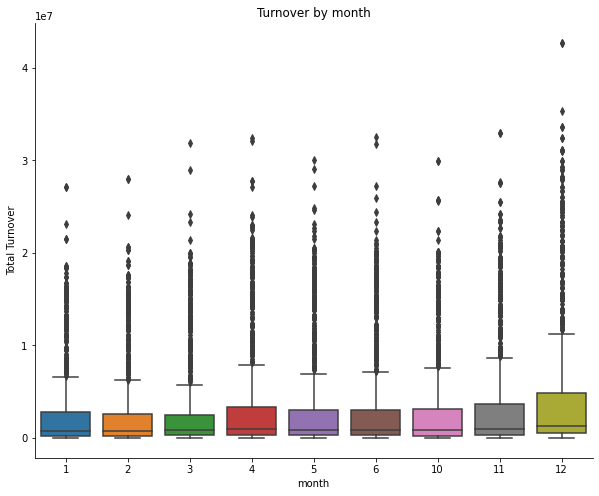

In [286]:
plt.figure(figsize=(10,8))
fig_boxplot = sns.boxplot(data = sales,
                          x = 'month', y = 'Turnover',
                          orient = 'v')
fig_boxplot.set_ylabel('Total Turnover')
sns.despine()
plt.title('Turnover by month')

C:\Users\mishe\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


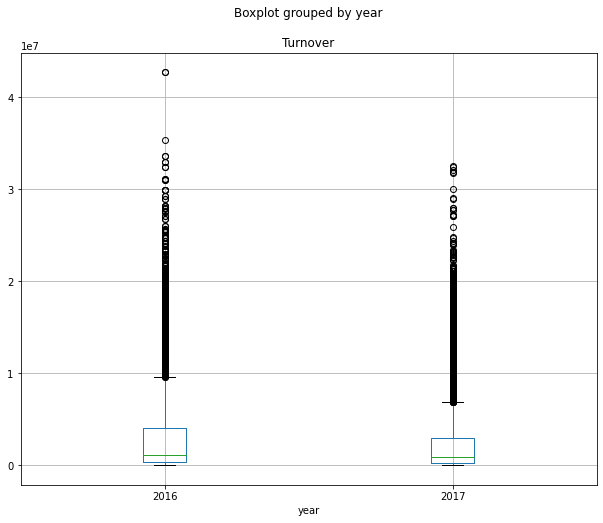

In [287]:
sales.boxplot(column='Turnover', by='year', figsize=(10, 8))

Both boxplots show quite a few outliers (stacking of points above the 75th percentile/quentile). This is to be expected with factors measuring sales, turnover, income, etc.

We can also spot seasonality and a peak in total turnover in the month of December (most likely driven by the holiday period).

However, the too many outliers may make spotting the trend a bit more difficult. 

**Q10. We have so far seen how the turnover of all stores looks like, aggregated on a monthly basis. Let's sum the total turnover across all stores on a monthly basis and plot that instead. What trend do you see?**

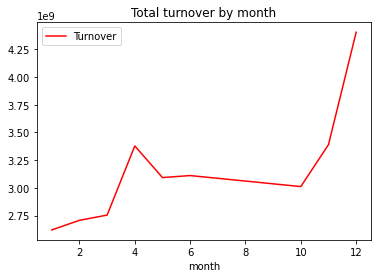

In [288]:
grouped = sales.groupby(['month'])['Turnover'].sum().reset_index()

grouped.plot(x='month' , y='Turnover', color='red')
plt.title('Total turnover by month')
plt.show()

***Q10.1 You should see a clear peak around April and definite substantial increase from October onwards. How does the plot change when you take the mean of the Turnover per month?*** 

In [289]:
grouped2 = sales.groupby(['month'])['Turnover'].agg([np.mean, np.sum]).reset_index()
# Inspect how the new data looks like
print(grouped2)

   month       mean           sum
0      1 3082840.22 2620414191.00
1      2 3184692.84 2706988917.00
2      3 3240342.26 2754290922.00
3      4 3974519.70 3378341742.00
4      5 3638388.01 3092629812.00
5      6 3659784.57 3110816883.00
6     10 3542851.15 3011423475.00
7     11 3988202.00 3389971698.00
8     12 5180915.74 4403778375.00


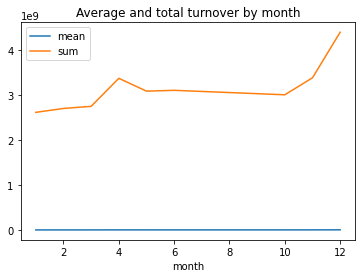

In [290]:
#Plot both the mean and the sum of the turnover per month
grouped2.plot(x='month')
plt.title('Average and total turnover by month')
plt.show()

Since the two scales are rather different, we may not want to plot them on the same plot but on two separate ones instead. The easiest way to do that is by defining one parameter of interest (namely, *subplots*).

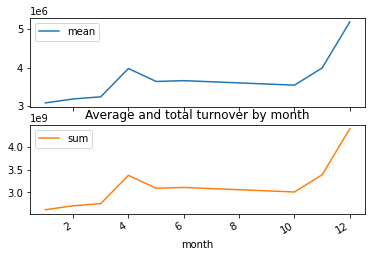

In [291]:
grouped2.plot(x='month', subplots=True)
plt.title('Average and total turnover by month')
plt.show()

**Q11. Sometimes instead of a boxplot we can use a violin plot, which allows better glimpse of the distribution of the data, compared to a boxplot, especially when we have a lot of observations. Your task in this exercise is to create a violin plot of the turnover by month, but only for the departments with name 'all'.**

    Hint: You may want to use the violinplot() function in seaborn
    HINT2: Be careful with the name of the Department Name feature as well :) 

Text(0.5, 1.0, 'Turnover by month for departnment name "all" ')

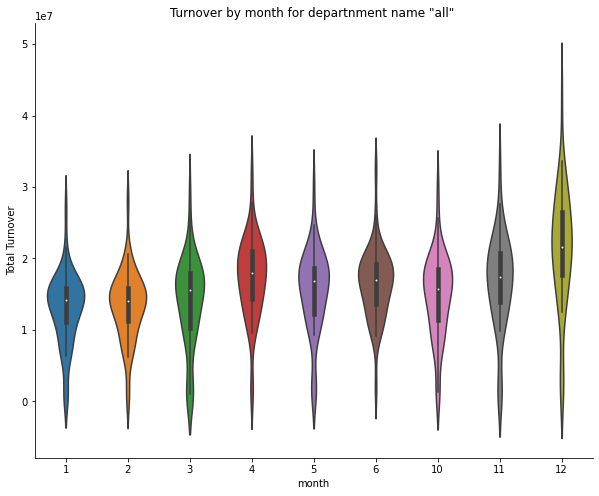

In [292]:
plt.figure(figsize=(10,8))
fig_violin = sns.violinplot(data = sales[sales['Dept. Name'] == 'all'],
                          x = 'month', y = 'Turnover',
                          width = 0.6,
                          orient = 'v')
fig_violin.set_ylabel('Total Turnover')
sns.despine()
plt.title('Turnover by month for departnment name "all" ')

**Q12. We often would need to check whether we can work with all features and whether their distributions all make sense. Let's start by checking the turnover distribution across departments. Your task is to create a histogram or another plot you see fit of the turnover at a department name level.**

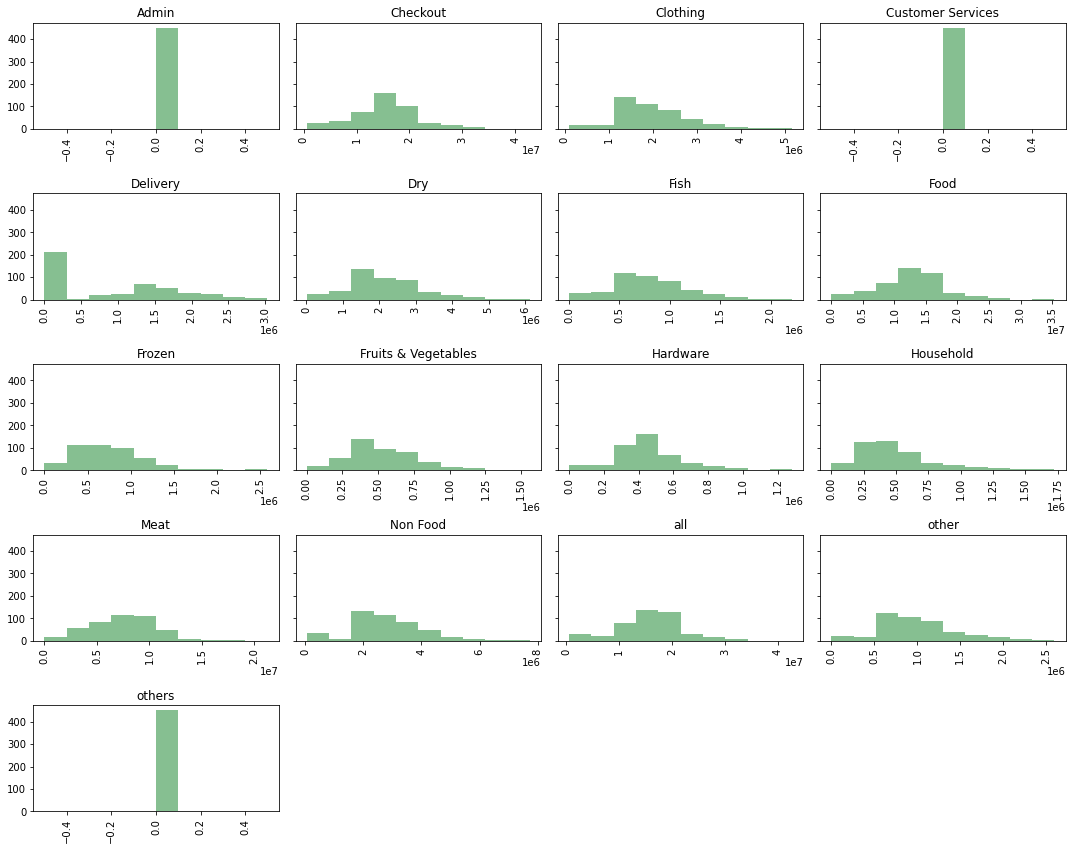

In [293]:
# Example using matplotlit
sales['Turnover'].hist(by=sales['Dept. Name'], sharey=True, sharex=False, figsize=(15, 12), color='#86bf91')
plt.tight_layout()
plt.show()

C:\Users\mishe\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\mishe\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\mishe\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


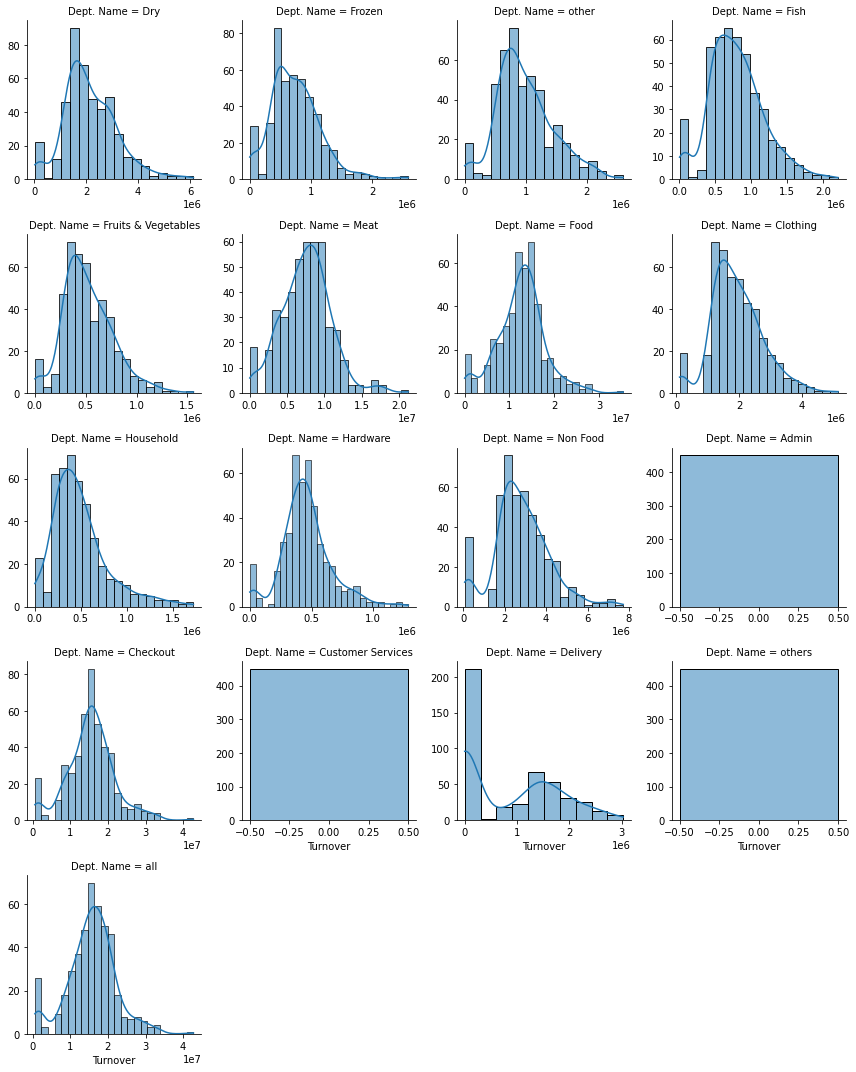

In [294]:
# Example using seaborn
grid = sns.FacetGrid(sales, col = 'Dept. Name',
                             col_wrap = 4,
                             sharex = False, sharey = False)
grid.map(sns.histplot, 'Turnover', kde=True)

As we notice from the warnings of the seaborn histogram,  and the matplotlib histogram as well, there is not a lot of variance for some of the departments (and perhaps single observation). 

**Q12.1. Inspect one of the non-varying categories of department name and its turnover. What do you see? How would you deal with such a problem?**

In [295]:
sales[sales['Dept. Name'] == 'others']['Turnover'].describe()

count   450.00
mean      0.00
std       0.00
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       0.00
Name: Turnover, dtype: float64

**Q13. We may want to explore the mutual relationship between variables. In the following exercise, create a pairwise plot between the features for Hours of lease, Sales unit, Turnover and the Area. Note the spelling of each and their types. Are they the types you expected? If not, why is that? Fix the issue you see. Do you spot any interesting relationships in the pairwise plot?**

In [297]:
sales[['HoursLease','Sales units','Turnover','Area (m2)']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7650 entries, 0 to 7657
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HoursLease   7650 non-null   float64
 1   Sales units  7650 non-null   float64
 2   Turnover     7650 non-null   float64
 3   Area (m2)    7650 non-null   object 
dtypes: float64(3), object(1)
memory usage: 618.8+ KB


In [299]:
# Drop the values of area which are invalid and the type becomes numeric
sales = sales[sales['Area (m2)'] != '#NV']
sales['Area (m2)'].value_counts()

0.00        1600
914.28        17
595.08        14
893.76        13
877.80        13
            ... 
5843.64        1
20522.28       1
9874.68        1
14040.24       1
18297.00       1
Name: Area (m2), Length: 2825, dtype: int64

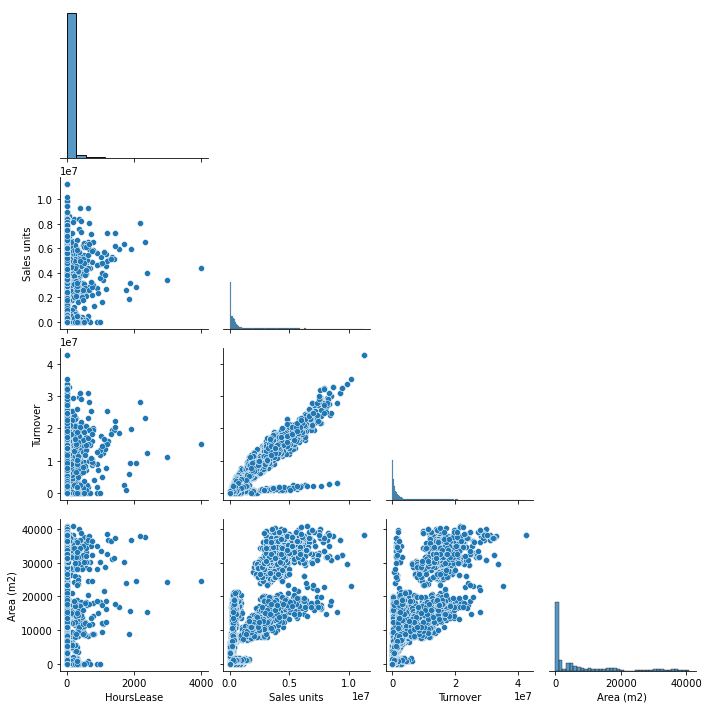

In [315]:
# Pairwise relationship
pp = sns.pairplot(sales, 
                  corner=True,
                  vars = ['HoursLease',
                          'Sales units',
                          'Turnover',
                          'Area (m2)'])